# Amal Lazreg
# 2LM2 TP2
# Simulation du jeux de LIDO simplifié

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [1]:
import numpy as np

### Simulation du lancé de dé

In [2]:
def Roll():
    return int(np.random.choice(range(1,7),1))

on va lancée un dé donc on obtenir un nombre de 1 a 6 c'est pourquoi j'utilise range(1,7) et 7 car range(1,n) en python  donne un nombre aleatoire de 1 a n-1 

In [3]:
Roll()

3

### Compléter le code et commenter

In [4]:
A=0 #prison
NA=0
S=10
c=0
temp = Roll()
NA+=1
print(NA,temp)
while temp!=6 :  
    temp=Roll()
    NA+=1 
    print(NA,temp)
A=1 
print('sortie de la prison apres {} coups '.format(NA))
print(NA,temp,A)
while  A<S : 
    temp = Roll() 
    if temp+A<S : 
        NA+=1 
        A+=temp 
        print(NA,temp,A)
    elif temp+A>S : 
        NA+=1
        print(NA,temp,A)
    else :
        A=S
        NA+=1 
        print(NA,temp,A) 

1 4
2 6
sortie de la prison apres 2 coups 
2 6 1
3 4 5
4 5 10


A : represente la position de pion on va l'initialiser a 0 car au debut le pion est dans le pison .
NA : represente le nombre de coups .
S : initialiser a 10 car la distance entre le prison et le cible est egale a 10 .
tout d'abord on va lancé (temp = Roll () ) le dé d'ou le NA recoit NA+=1
le premier boucle while nous donne  le nombre de coups ou le pion va sortir de la prison (c'est a dire on obtenir 6 (temp=6) ).
le deuxieme boucle while permet de tester la valeur temp+A avec S et le pion va deplacer  a savoir la condition de temp+A et S (il faut que temp+A < s ou temp+A = s pour que le pion se deplace sinon il reste a ca place )  et en meme temps pour chaque iteration NA+=1 . 


In [5]:
def sim (S) : 
    A=0 #prison
    NA=0
    c=0
    temp = Roll()
    NA+=1
    while temp!=6 :  
        temp=Roll()
        NA+=1 
    A=1 
    while  A<S : 
        temp = Roll() 
        if temp+A<S : 
            NA+=1 
            A+=temp 
        elif temp+A>S : 
            NA+=1
        else :
            A=S
            NA+=1 
    return NA


c'est la meme chose mais ici c'est une fonction qui prend comme variable le nombre de pas nécessaire pour atteindre la cible


In [6]:
sim(20)


15

In [7]:
#simulation 10000 fois n=30
L=[sim(30) for i in range(10000)]
moy = sum(L)/10000
print('estimation de la moyenne de x_30={}'.format(moy))


estimation de la moyenne de x_30=19.0691


In [8]:
x=list(range(10,20))
x
y=[sum([sim(u) for i in range(10000)])/10000 for u in x]

In [9]:
x

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [10]:
import matplotlib.pyplot as plt

In [11]:
y

[13.443,
 13.6304,
 13.711,
 14.252,
 14.5892,
 14.6716,
 14.9813,
 15.3125,
 15.5334,
 15.9393]

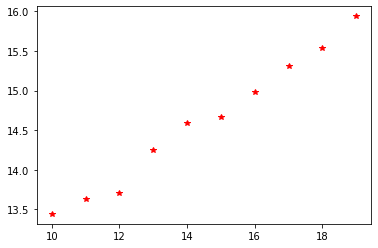

In [12]:
plt.plot(x,y,'*r')
plt.show()


In [13]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [14]:
slope

0.2791848484848485

In [15]:
intercept

10.558189696969695

In [16]:
yy=[slope *u +intercept for u in x]

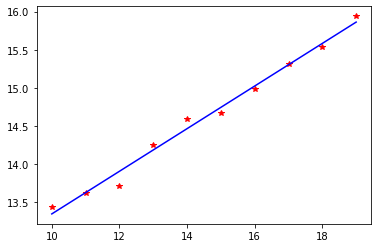

In [17]:
plt.plot(x,y,'*r',x,yy,'-b')

E(x_n)~ = 0.28*n+10.55


c'est une relation avec une regression linéaire 